In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
vis1_df = pd.read_csv("figure_data/exp1_comparison.csv")


# filter to relevant columns
vis1_df = vis1_df[["method", "spamming_rate", "divisiveness_rate", "majority_accuracy", "minority_accuracy"]]

# melt together majority and minority for visualization
vis1_df = vis1_df.melt(id_vars=["method", "spamming_rate", "divisiveness_rate"], value_vars=["majority_accuracy", "minority_accuracy"], var_name="Subpopulation", value_name="accuracy")

# change measure names to remove underscores
vis1_df["Subpopulation"] = vis1_df["Subpopulation"].map({"majority_accuracy":"Majority", "minority_accuracy":"Minority"})
vis1_df = vis1_df.rename(columns={'spamming_rate':'Spamming Rate', 'Subpopulation':'\nSubpopulation'})


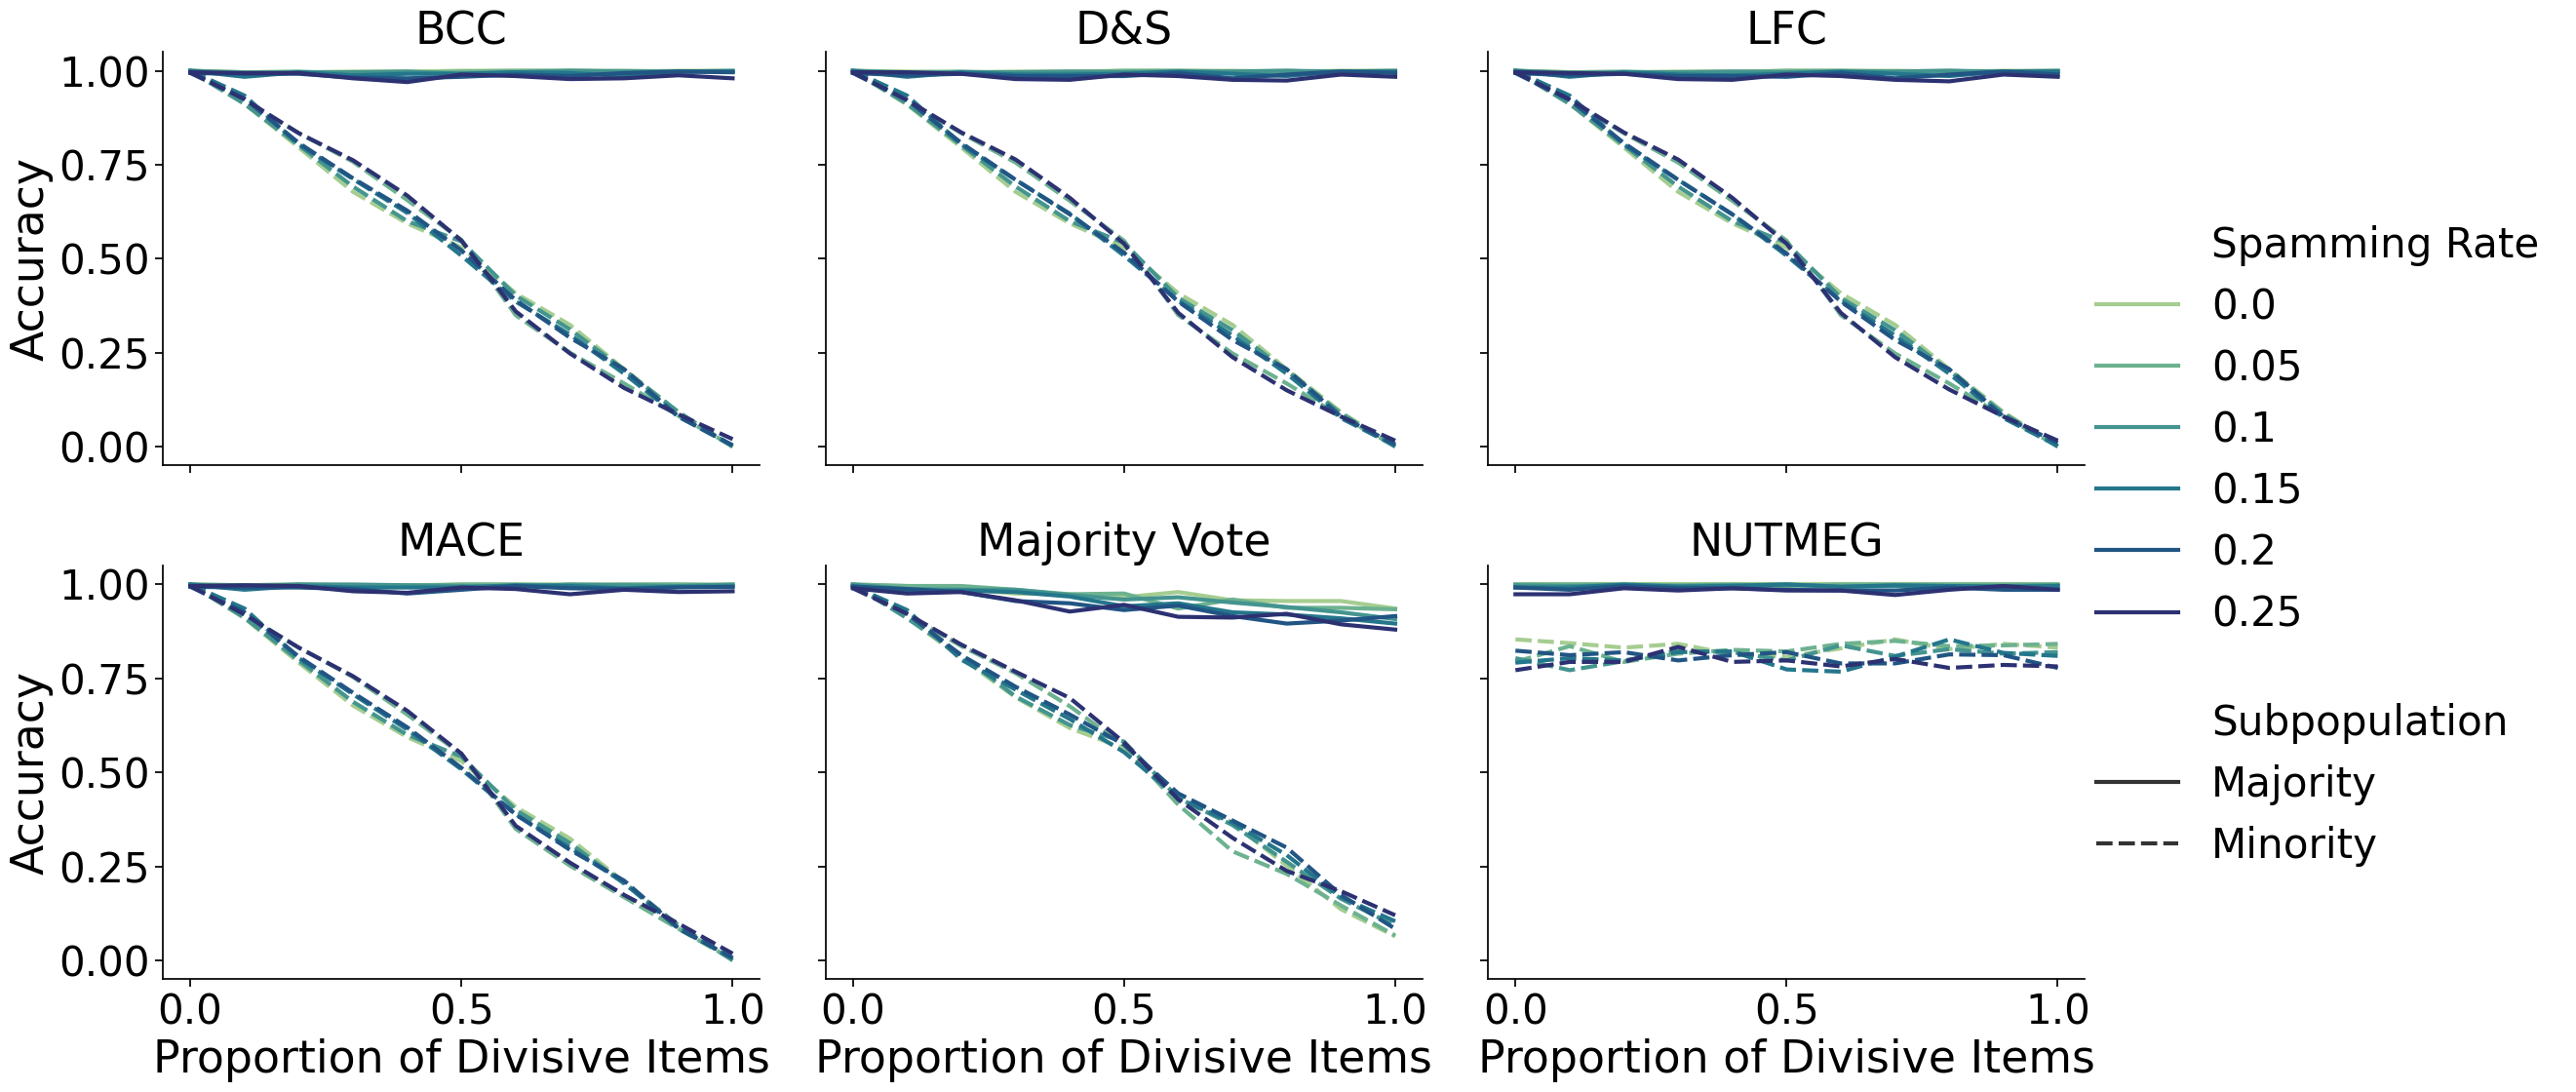

In [50]:
# set font and theme
sns.reset_defaults()
sns.set_context("notebook", font_scale=2.75)

# Create the facetgrid
g = sns.FacetGrid(vis1_df, col="method", height=6, col_wrap=3, aspect=1.25)

# map the second lineplot with dashed lines
g.map_dataframe(sns.lineplot, x="divisiveness_rate", y="accuracy", 
                hue="Spamming Rate", style="\nSubpopulation", 
                palette=sns.color_palette("crest", as_cmap=True), linewidth=3)


g.set_axis_labels("Proportion of Divisive Items", "Accuracy")
g.add_legend()
g.set_titles("{col_name}")

plt.savefig("mace_nutmeg_comparison.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [2]:
spam_div_df = pd.read_csv("figure_data/mace_nutmeg_comparison.csv")

# remove the 50% spam instances
vis1_df = spam_div_df[spam_div_df["spamming_rate"] != 0.5]

# filter to relevant columns
vis1_df = vis1_df[["method", "spamming_rate", "divisiveness_rate", "majority_accuracy", "minority_accuracy"]]

# melt together majority and minority for visualization
vis1_df = vis1_df.melt(id_vars=["method", "spamming_rate", "divisiveness_rate"], value_vars=["majority_accuracy", "minority_accuracy"], var_name="Subpopulation", value_name="accuracy")

# change measure names to remove underscores
vis1_df["Subpopulation"] = vis1_df["Subpopulation"].map({"majority_accuracy":"Majority", "minority_accuracy":"Minority"})
vis1_df = vis1_df.rename(columns={'spamming_rate':'Spamming Rate', 'Subpopulation':'\nSubpopulation'})


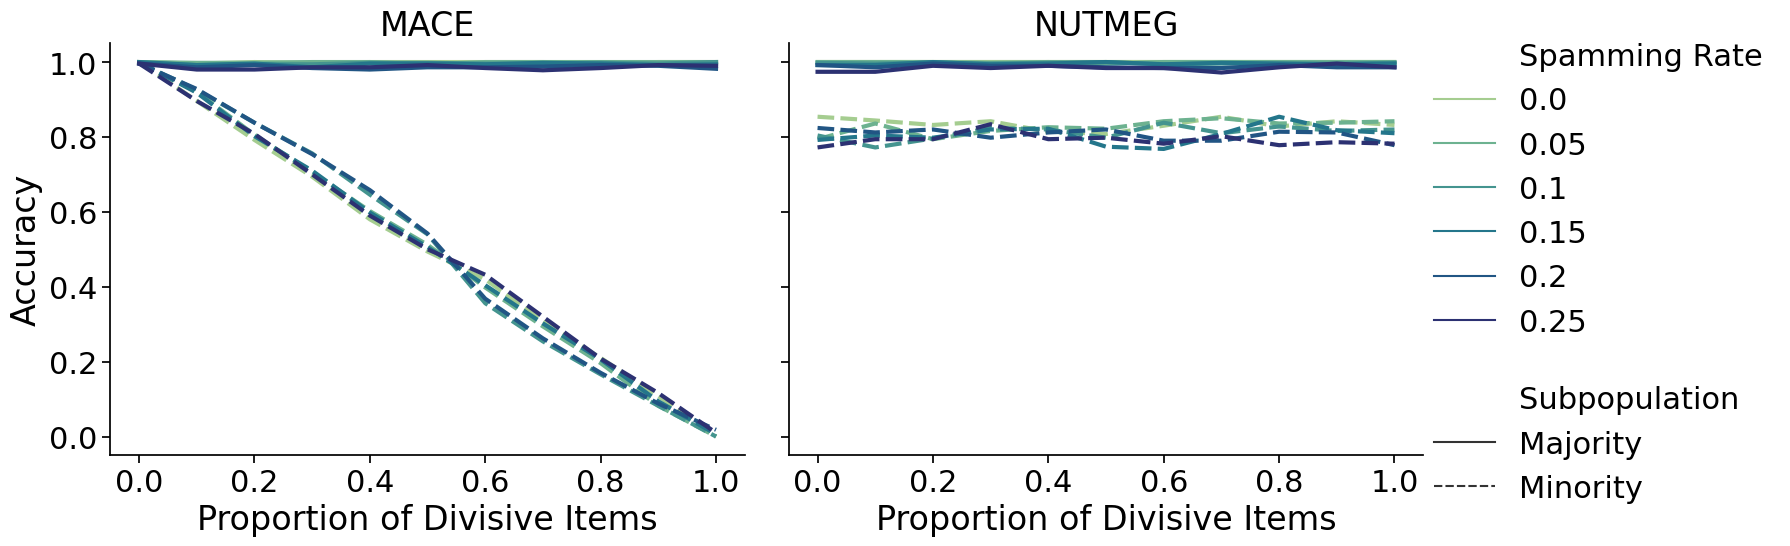

In [3]:
# set font and theme
sns.reset_defaults()
sns.set_context("notebook", font_scale=2)

# Create the facetgrid
g = sns.FacetGrid(vis1_df, col="method", height=6, aspect=1.25)

# map the second lineplot with dashed lines
g.map_dataframe(sns.lineplot, x="divisiveness_rate", y="accuracy", 
                hue="Spamming Rate", style="\nSubpopulation", 
                palette=sns.color_palette("crest", as_cmap=True), linewidth=3)


g.set_axis_labels("Proportion of Divisive Items", "Accuracy")
g.add_legend()
g.set_titles("{col_name}")

plt.savefig("mace_nutmeg_comparison.pdf", format="pdf", bbox_inches="tight")
plt.show()